<a href="https://colab.research.google.com/github/XuRui314/MIT_6.036_homework_zxr/blob/main/%E6%A8%A1%E5%BC%8F%E8%AF%86%E5%88%AB%E4%BD%9C%E4%B8%9A%E4%BA%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 对下面的四个样本应用感知器学习算法, 直到其收敛。从权向量 $\left(w_0, w_1, w_2, w_3\right)^T=(1,0,0,0)^T$ 开始，根据给定顺序循环地应用样本更新（每次用 一个样本)。对于感知器学习的每一步, 记下应用的样本、分类结果和权向量的 更新。
$$
(4,3,6)^T \in \mathcal{N}, \quad(2,-2,3)^T \in \mathcal{P}, \quad(1,0,-3)^T \in \mathcal{P}, \quad(4,2,3)^T \in \mathcal{N}
$$


假设我们有训练集 $\mathcal{D}_n$ ， $x \in \mathbb{R}^d$, $y \in\{-1,+1\}$。 感知机算法训练得到一个二分类器 $h\left(x ; \theta, \theta_0\right)$ 用如下的迭代算法找到 $\theta$ and $\theta_0$ 。

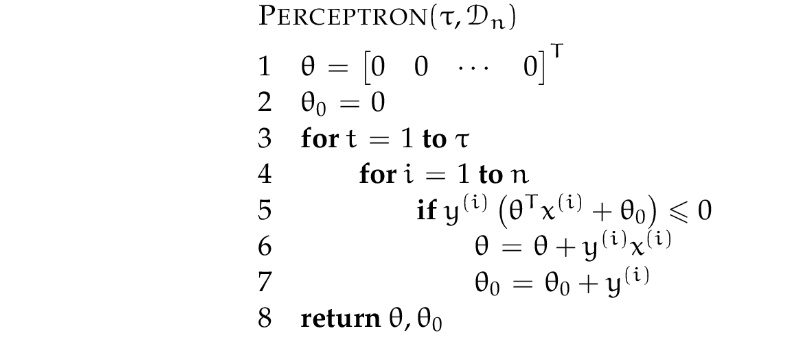

直觉上来说，如果当前的$\theta$和$\theta_0$正确地区分了样本点$x_i$，那么就不会更新，而如果没区分对，那就让$\theta$和$\theta_0$向着正确区分$x_i,y_i$的方向靠近。收敛性的证明可以看：[link](https://openlearninglibrary.mit.edu/courses/course-v1:MITx+6.036+1T2019/courseware/Week2/perceptron/?activate_block_id=block-v1%3AMITx%2B6.036%2B1T2019%2Btype%40sequential%2Bblock%40perceptron)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = np.array([[4,3,6],[2,-2,3],[1,0,3],[4,2,3]]).transpose((1,0))
label = np.array([[-1,1,1,-1]])
theta = np.array([1,0,0]).reshape(-1,1)
theta0 = 0

In [3]:
data

array([[ 4,  2,  1,  4],
       [ 3, -2,  0,  2],
       [ 6,  3,  3,  3]])

Text(0.5, 0, 'petal length (cm)')

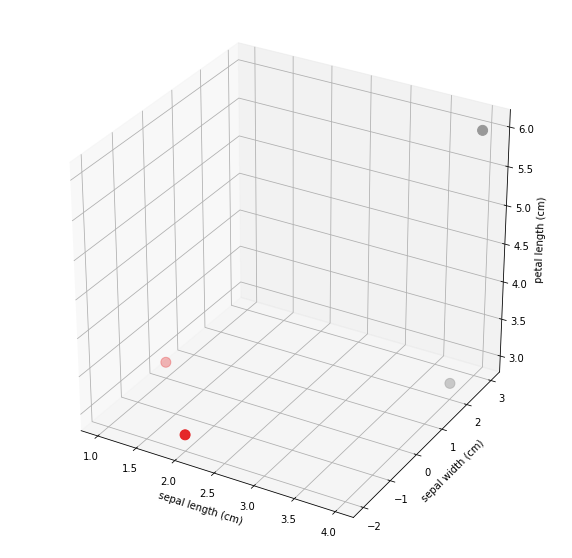

In [4]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[0,:], data[1,:], data[2,:],s= 100,  c=[1,0,0,1], cmap=plt.cm.Set1 )
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('petal length (cm)')


In [5]:
def perceptron(data, labels, params = {}, hook = None):
  d,n = data.shape
  T = params.get('T', 100)
  th = params.get('th', np.zeros((d, 1)))
  th0 = params.get('th0', 0)

  for t in range(T):
    for i in range(n):
      if labels[0][i] * (th.T @ data[:, i] + th0) <= 0:
        th += labels[0][i] * data[:, i].reshape(-1,1)
        th0 += labels[0][i]

  return th, th0

下面是我之前写的版本，比较美观。

In [6]:
import numpy as np

# x is dimension d by 1
# th is dimension d by 1
# th0 is dimension 1 by 1
# return 1 by 1 matrix of +1, 0, -1
def positive(x, th, th0):
   return np.sign(th.T@x + th0)

# Perceptron algorithm with offset.
# data is dimension d by n
# labels is dimension 1 by n
# T is a positive integer number of steps to run
# Perceptron algorithm with offset.
# data is dimension d by n
# labels is dimension 1 by n
# T is a positive integer number of steps to run
def Perceptron(data, labels, params = {}, hook = None):
    # if T not in params, default to 100
    T = params.get('T', 100)
    
    (d, n) = data.shape
    theta = params.get('th', np.zeros((d, 1)))
    theta_0 = params.get('th0', 0)

    for t in range(T):
        for i in range(n):
            x = data[:,i:i+1]
            y = labels[:,i:i+1]
            if y * positive(x, theta, theta_0) <= 0.0:
                theta = theta + y * x
                theta_0 = theta_0 + y
                if hook: hook(theta, theta_0)
    return theta, theta_0

用mit的测评器检验一下算法的正确性：

In [7]:
!rm -f code_for_hw02.py*
!wget --no-check-certificate --quiet https://introml_oll.odl.mit.edu/6.036/static/homework/hw02/code_for_hw02.py
from code_for_hw02 import *

Importing code_for_hw02
New procedures added: tidy_plot, plot_separator, plot_data, plot_nonlin_sep, cv,
                      rv, y, positive, score
Data Sets: super_simple_separable_through_origin(), super_simple_separable(), xor(),
           xor_more()
Test data for problem 2.1: data1, labels1, data2, labels2
Test data for problem 2.2: big_data, big_data_labels, gen_big_data(), gen_lin_separable(),
                           big_higher_dim_separable(), gen_flipped_lin_separable()
Test functions: test_linear_classifier(), test_perceptron(), test_averaged_perceptron(),
                test_eval_classifier(), test_eval_learning_alg(), test_xval_learning_alg()

For more information, use 'help', e.g. 'help tidy_plot'
Done with import of code_for_hw02


In [8]:
test_perceptron(perceptron)

-----------Test Perceptron 0-----------
Passed! 

-----------Test Perceptron 1-----------
Passed! 



In [9]:
data = np.array([[4,3,6],[2,-2,3],[1,0,-3],[4,2,3]]).transpose((1,0))
label = np.array([[-1,1,1,-1]])
theta = np.array([1,0,0]).reshape(-1,1)
params = {'th':theta, 'T':20}

In [10]:
def ansprint(theta, theta_0):
  print("Update!")
  print("theta and theta_0 now is: ",theta," ",theta_0)

In [11]:
th, th0 = Perceptron(data, label, params, ansprint)

Update!
theta and theta_0 now is:  [[-3]
 [-3]
 [-6]]   [[-1]]
Update!
theta and theta_0 now is:  [[-1]
 [-5]
 [-3]]   [[0]]
Update!
theta and theta_0 now is:  [[ 1]
 [-7]
 [ 0]]   [[1]]


In [12]:
XX = np.arange(-2, 10, 0.1)
YY = np.arange(-2, 10, 0.1)
XX, YY = np.meshgrid(XX, YY)

Text(0.5, 0, 'y')

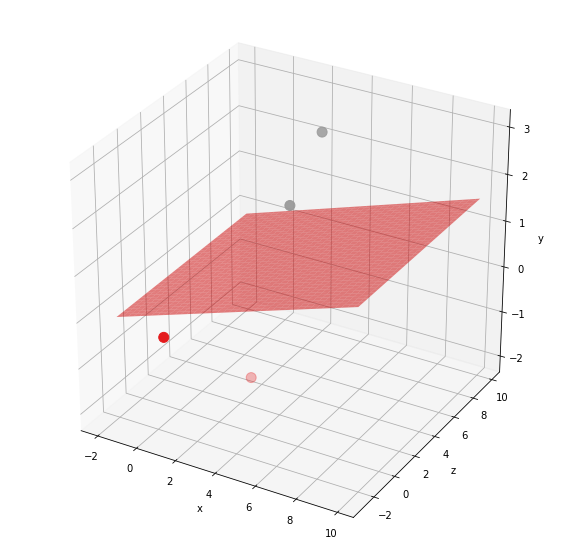

In [13]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[0,:], data[2,:], data[1,:], c=[1,0,0,1], s = 100, cmap=plt.cm.Set1 )
ax.plot_surface(X=XX,
                Y=YY,
                Z=1/7 * (XX + 1),
                color='r',
                alpha=0.5
               )
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')


2. 有两类样本集合:
- 类别 1 中有 5 个样本 $c_1=[(1,2),(2,3),(3,3),(4,5),(5,5)]$
- 类别 2 中有 6 个样本 $c_2=[(1,0),(2,1),(3,1),(3,2),(5,3),(6,5)]$

（1）使用主成分分析将特征降为 1 维，在二维空间中画出样本和投影坐标轴。

（2）使用 Fisher 判别分析将特征降为 1 维, 在二维空间中画出样本和投影坐标轴。

（3） 在使用 Fisher 判别分析降维后的 1 维空间中构建线性分类器区分两类样本。

（4）如果在主成分分析降维后的 1 维空间中构建线性分类器, 效果是否理想? 为什么?

In [14]:
data = np.array([[1,2],[2,3],[3,3],[4,5],[5,5],[1,0],[2,1],[3,1],[3,2],[5,3],[6,5]]).transpose(1,0)
labels = np.array([1,1,1,1,1,2,2,2,2,2,2])

In [15]:
data

array([[1, 2, 3, 4, 5, 1, 2, 3, 3, 5, 6],
       [2, 3, 3, 5, 5, 0, 1, 1, 2, 3, 5]])

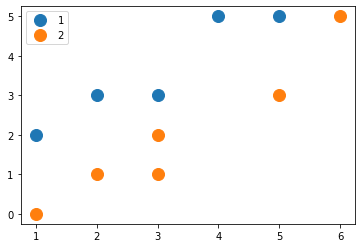

In [16]:
import matplotlib.pyplot as plt
# 对于分组变量的处理


import pandas as pd

#create DataFrame
df = pd.DataFrame({'x': data[0],
                   'y': data[1],
                   'z': labels})

groups = df.groupby('z')
for name, group in groups:
    plt.plot(group.x, group.y, marker='o', linestyle='', markersize=12, label=name)

plt.legend()


仿照sklearn手动实现PCA：

In [17]:
def PCA(X, n_components):
  d,n = X.shape
  if(n_components > d):
    print("n_components too big!")
    return
  X_mean = X.mean(axis = 1).reshape(-1,1)
  X = X - X_mean  
  Cov = (X @ X.T) / (n - 1)
  print("Cov matrix is:\n", Cov)
  eig_val, eig_vec = np.linalg.eig(Cov)
  print("eig_val is:\n", eig_val)
  print("eig_vec is:\n", eig_vec) # d by d col vectors
  sign = eig_vec.sum(axis = 1).reshape(-1,1)
  result = eig_vec.T @ X
  indice = np.argsort(-eig_val)  # sort
  result = result[indice[0:n_components]] 
  print("the reduced dim data is:\n", result)
  return result

In [18]:
ans = PCA(data, 1)

Cov matrix is:
 [[2.76363636 2.25454545]
 [2.25454545 3.01818182]]
eig_val is:
 [0.63277412 5.14904406]
eig_vec is:
 [[-0.72676058 -0.68689087]
 [ 0.68689087 -0.72676058]]
the reduced dim data is:
 [[ 2.02722413  0.61357268 -0.07331818 -2.21373021 -2.90062107  3.48074529
   2.06709384  1.38020298  0.6534424  -1.44709991 -3.58751194]]


和sklearn核对一下结果：

In [50]:
from sklearn.decomposition import PCA
principal=PCA(n_components=1)
principal.fit_transform(data.T)

array([[-2.02722413],
       [-0.61357268],
       [ 0.07331818],
       [ 2.21373021],
       [ 2.90062107],
       [-3.48074529],
       [-2.06709384],
       [-1.38020298],
       [-0.6534424 ],
       [ 1.44709991],
       [ 3.58751194]])

In [51]:
principal.components_

array([[0.68689087, 0.72676058]])

In [74]:
principal.mean_ + [0.68689087, 0.72676058]

array([3.86870905, 3.45403331])

In [53]:
principal.mean_

array([3.18181818, 2.72727273])

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [57]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

[3.18181818 2.72727273]
[7.85779447 7.67466015]
[3.18181818 2.72727273]
[4.91616908 1.08806743]


[(-3.0, 3.1),
 Text(0, 0.5, 'component 2'),
 (-5.0, 5.0),
 Text(0.5, 0, 'component 1'),
 Text(0.5, 1.0, 'principal components')]

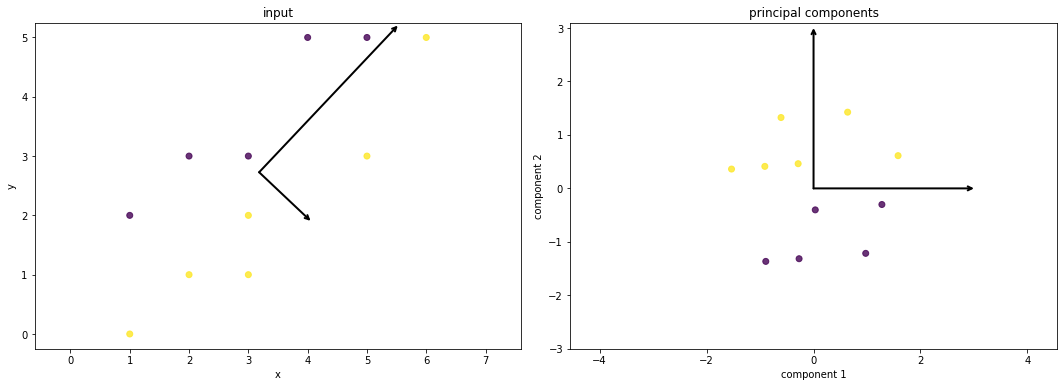

In [83]:
rng = np.random.RandomState(1)
X = data.T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1],c = labels, cmap= 'viridis' ,alpha=0.8)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    print(pca.mean_)
    print(pca.mean_ + v)
    draw_vector(pca.mean_, pca.mean_ + v/2, ax=ax[0]) # 这里除以2和画图的尺度有关

# draw_vector([3.18181818, 2.72727273], [7.85779447 /2  ,7.67466015 / 2], ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c = labels, cmap= 'viridis',alpha=0.8)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data.T)

PCA(n_components=2)

LDA分析：

In [117]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1) #creating a LDA object
lda = lda.fit(data.T, labels) #learning the projection matrix
X_lda = lda.transform(data.T) #using the model to project X 
X_lda

array([[-2.50328575],
       [-2.72569306],
       [-0.89348045],
       [-3.17050768],
       [-1.33829507],
       [ 1.60595409],
       [ 1.38354678],
       [ 3.21575938],
       [ 1.16113947],
       [ 2.77094476],
       [ 0.49391753]])

(-3.0, 6.0)

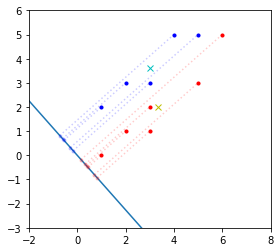

In [130]:
a = data.T[0:5]
b = data.T[5:]
plt.plot(a[:,0], a[:,1], 'b.', b[:,0], b[:,1], 'r.')
mu_a, mu_b = a.mean(axis=0).reshape(-1,1), b.mean(axis=0).reshape(-1,1)
Sw = np.cov(a.T) + np.cov(b.T)
inv_S = np.linalg.inv(Sw)
res = inv_S.dot(mu_a-mu_b)  # the trick
####
# more general solution
#
# Sb = (mu_a-mu_b)*((mu_a-mu_b).T)
# eig_vals, eig_vecs = np.linalg.eig(inv_S.dot(Sb))
# res = sorted(zip(eig_vals, eig_vecs), reverse=True)[0][1] # take only eigenvec corresponding to largest (and the only one) eigenvalue
# res = res / np.linalg.norm(res)


plt.plot([-res[0], res[0]], [-res[1], res[1]]) # this is the solution
plt.plot(mu_a[0], mu_a[1], 'cx')
plt.plot(mu_b[0], mu_b[1], 'yx')
plt.gca().axis('square')

# let's project data point on it
r = res.reshape(2,)
n2 = np.linalg.norm(r)**2
for pt in a:
    prj = r * r.dot(pt) / n2
    plt.plot([prj[0], pt[0]], [prj[1], pt[1]], 'b.:', alpha=0.2)
for pt in b:
    prj = r * r.dot(pt) / n2
    plt.plot([prj[0], pt[0]], [prj[1], pt[1]], 'r.:', alpha=0.2)
plt.xlim((-2, 8))
plt.ylim((-3, 6))

PCA和LDA结果的对比：

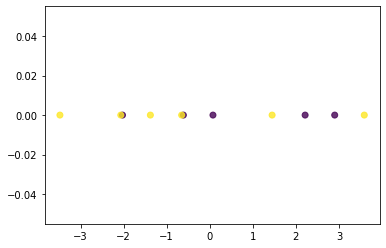

In [88]:
plt.scatter(principal.fit_transform(data.T).transpose(1,0), [0]*11,c = labels, cmap= 'viridis' ,alpha=0.8)


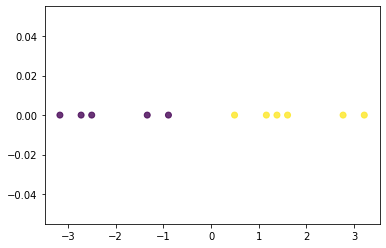

In [90]:
plt.scatter(X_lda.transpose(1,0), [0]*11,c = labels, cmap= 'viridis' ,alpha=0.8)


In [107]:
# 构建线性分类器：利用之前写的感知机
params = {'T':50}
labels_p = np.array([[1,1,1,1,1,-1,-1,-1,-1,-1,-1]])
th, th0 = Perceptron(X_lda.transpose(1,0), labels_p, params)
print(th, th0)

[[-2.50328575]] [[1]]


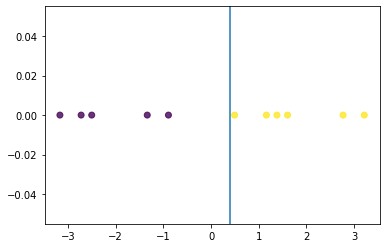

In [115]:
plt.scatter(X_lda.transpose(1,0), [0]*11,c = labels, cmap= 'viridis' ,alpha=0.8)
plt.axvline(x = -th0 / th)
plt.show()


PCA最后的结果不是很理想，原因在于忽略了标签类别的信息，只是根据数据分布的形态找主成分轴。

主成分的方向暂且不考虑正负:)


3. 有如下图所示的 3 层感知器网络, 其中隐含层和输出层均采用符号函数作为 激活函数:
$$
f(u)=\left\{\begin{array}{l}
+1, u \geqslant 0 \\
-1, u<0
\end{array}\right.
$$
请计算针对下列输入的网络输出, 并确定其类别属性:
$$
\boldsymbol{x}_1:(-1,+1,+1,-1)^T, \boldsymbol{x}_2:(+1,+1,-1,-1)^T, \boldsymbol{x}_3:(-1,+1,-1,+1)^T
$$

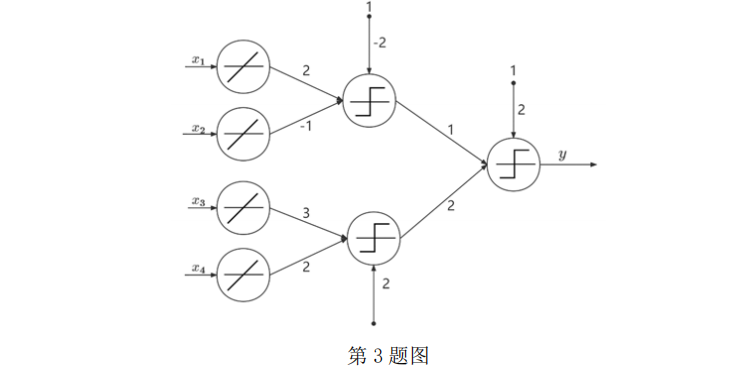

In [ ]:
def stepwise(x):
  if x >= 0:
    return 1
  return -1

def perceptron_net(x):
  temp1 = stepwise(2 * x[0] - x[1] - 2)
  temp2 = stepwise(x[2] * 3 + 2 * x[3] + 2)
  y = stepwise(temp1 + 2 * temp2 + 2)
  print("The prediction category is:", y)  


In [ ]:
data = np.array([[-1,1,1,-1],[1,1,-1,-1],[-1,1,-1,1]])
# 当然这里也可以用matrix操作，方便起见我就直接迭代了
for i in range(data.shape[0]):
  perceptron_net(data[i])

The prediction category is: 1
The prediction category is: -1
The prediction category is: 1


4. 线性 SVM 分类器在参数 $\mathrm{C}=5$ 的条件下得到如下训练结果:
第一类支持向量: $x_1=(1,1,1)^T, \alpha_1=4$
第二类支持向量: $x_2=(1,2,1)^T, \alpha_2=2 ; x_3=(0,1,1)^T, \alpha_3=2$
写出对应的线性判别函数, 并判别下列样本的类别属性, 以及相对于支持面和判 别界面的位置关系:
$$
\boldsymbol{y}_1=(0.2,1,2)^T, \boldsymbol{y}_2=(2,2,1)^T, \boldsymbol{y}_3=(3,-3,2)^T
$$


手写模拟的话推荐6.034的习题课：[link](https://www.youtube.com/watch?v=ik7E7r2a1h8)，应该是去年我跟着学的，小姐姐讲的很好hh

这题就直接手算就好了，先算$w$

$$
\boldsymbol{w}=\sum_{i=1}^3 \alpha_i z_i \boldsymbol{x}_i=4 \times\left(\begin{array}{l}
1 \\
1 \\
1 \\
\end{array}\right)-2 \times\left(\begin{array}{l}
1 \\
2 \\
1 \\
\end{array}\right)-2 \times\left(\begin{array}{l}
0 \\
1 \\
1 \\
\end{array}\right)=\left(\begin{array}{l}
2 \\
-2 \\
0
\end{array}\right)
$$
选择 $\boldsymbol{x}_1$ 作为支持向量, 计算偏置 $w_0$ :
$$
w_0=z_1-\boldsymbol{w}^T \boldsymbol{x}_1=1-(2,-2,0) \times\left(\begin{array}{l}
1 \\
1 \\
1
\end{array}\right)=1
$$
因此线性判别函数为
$$
g(\boldsymbol{x})=\boldsymbol{w}^T \boldsymbol{x}+w_0=2 x_1-2x_2+1
$$

将点带入$g(x)$可以得到：
$$
g(\boldsymbol{y}_1) = -0.6, g(\boldsymbol{y}_2) = 1, g(\boldsymbol{y}_3) = 13
$$

这说明这三个点分别位于第2类支持面与分类界面之间、分类界面上、第1类分类界面外。

5. 编程实现 BP 算法, 其中隐含层和输出层的激活函数采用双曲正切 型 Sigmoid 函数。类似例题 $6.2$, 学习如下训练样本和期望输出的三层感知器网 络。
$$
\begin{aligned}
&\boldsymbol{x}_1=(-1,-1)^T, \boldsymbol{t}_1=(-1,-1)^T, \boldsymbol{x}_2=(+1,+1)^T, \boldsymbol{t}_2=(-1,+1)^T \\
&\boldsymbol{x}_3=(+1,-1)^T, \boldsymbol{t}_3=(+1,+1)^T, \boldsymbol{x}_4=(-1,+1)^T, \boldsymbol{t}_4=(+1,+1)^T
\end{aligned}
$$